In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
import os
import re
import seaborn as sns
warnings.filterwarnings("ignore")

C:\Users\aminm\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
names = {"Farhad Abbasi": ["Iran", "male"],
         "Maryam Abbasi": ["Iran", "female"],
         "Haoyu Wang": ["China", "male"],
         "Yi-Nuo": ["China", "female"],
         "Max Müller": ["Germany", "male"],
         "Emilia Müller": ["Germany", "female"],
         "Peter Schmidt": [np.nan, np.nan]
        }

names_df = pd.DataFrame.from_dict(names, orient='index', columns=['Country', 'Gender'])


In [3]:
# Define the root directory containing the folders
root_directory = "C:/Users/aminm/OneDrive/Desktop/Uni MA Master/3. Semester/Team Project LLM/hubsim/parsing/output-04.03.2024/Open-Ended"

# List of folders to process
folders = ["Bagel-Bagel",
           "Bagel-Yi",
           "Yi-Bagel",
           "Yi-Yi"]

# Initialize an empty dictionary to store the DataFrames for each folder
folder_dfs = {}

# Iterate over each folder
for folder in folders:
    full_path = os.path.join(root_directory, folder)
    # Initialize an empty DataFrame for the current folder
    df = pd.DataFrame()
    # Iterate over each file in the current folder
    for name in os.listdir(full_path):
        # Extract experiment information from the file name
        experiment_info = re.findall(r"bagel-dpo-34b-v0.2|Yi-34B-Chat|Magdeburg|Duisburg|München|Emilia Müller|Max Müller|Maryam Abbasi|Farhad Abbasi|Yi-Nuo|Haoyu Wang|Germany|Iran|China?", name)
        model_landlord = experiment_info[0]
        renter_name = experiment_info[1]
        country = experiment_info[2]
        model_renter = experiment_info[3]
        city = experiment_info[4]
        # Read the CSV file into a DataFrame
        results = pd.read_csv(os.path.join(full_path, name), encoding='unicode_escape')
        # Modify the DataFrame as needed
        results["name"] = renter_name
        results["country"] = country
        results["gender"] = "male"
        results.loc[results["Name"] == "Peter Schmidt from Germany", 'name'] = "Peter Schmidt"
        results.loc[results["name"].isin(["Emilia Müller", "Maryam Abbasi", "Yi-Nuo"]), 'gender'] = "female"
        results["city"] = city
        results["model_renter"] = model_renter
        results["model_landlord"] = model_landlord
        results["cross_model"] = model_landlord.split("-", 1)[0].capitalize() + " - " + model_renter.split("-", 1)[0].capitalize()
        results["cross_model"] = results["cross_model"].str.replace("B", "b")
        # Concatenate the results to the current folder's DataFrame
        df = pd.concat([df, results], ignore_index=True)
        print(f"Appended {name} successfully to DataFrame for folder {folder}")

    # Store the DataFrame for the current folder in the dictionary
    folder_dfs[folder] = df

# Display the DataFrames for each folder
for folder, df in folder_dfs.items():
    print(f"DataFrame for folder {folder}:")
    print(df)


Appended landlord-bagel-dpo-34b-v0.2-Emilia Müller from Germany-bagel-dpo-34b-v0.2-Duisburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Emilia Müller from Germany-bagel-dpo-34b-v0.2-Magdeburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Emilia Müller from Germany-bagel-dpo-34b-v0.2-München-20240229.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Farhad Abbasi from Iran-bagel-dpo-34b-v0.2-Duisburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Farhad Abbasi from Iran-bagel-dpo-34b-v0.2-Magdeburg-20240228.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Farhad Abbasi from Iran-bagel-dpo-34b-v0.2-München-20240229.csv successfully to DataFrame for folder Bagel-Bagel
Appended landlord-bagel-dpo-34b-v0.2-Haoyu Wang from China-bagel-dpo-34b-v0.2-Duisbur

In [4]:
df_all = pd.concat([folder_dfs[crossm] for crossm in folders])

In [5]:
df_all["Folder Name"].describe()

count                                     3172
unique                                    1586
top       0288bc1a-aa7e-4c61-99ff-1a91fe58b9b8
freq                                         2
Name: Folder Name, dtype: object

In [6]:
display(folder_dfs["Bagel-Bagel"].head())
display(folder_dfs["Bagel-Yi"].head())
display(folder_dfs["Yi-Bagel"].head())
display(folder_dfs["Yi-Yi"].head())

,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,1500.0,1600.0,1550.000000,1600.0,0288bc1a-aa7e-4c61-99ff-1a91fe58b9b8,4,"1500.0, 1600.0","[1500.0, 1600.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
1,50,Peter Schmidt from Germany,1700.0,2000.0,1833.333333,1700.0,0288bc1a-aa7e-4c61-99ff-1a91fe58b9b8,4,"2000.0, 1800.0, 1700.0","[2000.0, 1800.0, 1700.0]",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
2,50,Emilia Müller from Germany,450.0,1000.0,695.000000,450.0,166befc2-e129-4d5e-8c27-eff528fd5930,13,"1000.0, 900.0, 1100.0, 800.0, 1000.0, 750.0, 9...","[1000.0, 900.0, 800.0, 750.0, 700.0, 600.0, 70...",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
3,50,Peter Schmidt from Germany,400.0,1500.0,955.000000,400.0,166befc2-e129-4d5e-8c27-eff528fd5930,13,"1500.0, 1400.0, 1200.0, 900.0, 1100.0, 1000.0,...","[1500.0, 1400.0, 1200.0, 1100.0, 1000.0, 900.0...",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel
4,50,Emilia Müller from Germany,500.0,700.0,616.666667,700.0,1dd98196-650d-4f07-a4e4-028eec038529,5,"500.0, 650.0, 700.0","[500.0, 650.0, 700.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,bagel-dpo-34b-v0.2,bagel - bagel


,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,1700.0,1760.0,1740.000000,1740.0,115b3d73-f5f7-403d-92c2-1a24fecb6fea,10,"1700.0, 1750.0, 1750.0, 1760.0, 1740.0","[1700.0, 1750.0, 1750.0, 1760.0, 1740.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
1,50,Peter Schmidt from Germany,1740.0,3480.0,2048.571429,3480.0,115b3d73-f5f7-403d-92c2-1a24fecb6fea,10,"2000.0, 1800.0, 1780.0, 1780.0, 1760.0, 1740.0...","[2000.0, 1800.0, 1780.0, 1780.0, 1760.0, 1740....",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
2,50,Emilia Müller from Germany,900.0,1100.0,1016.666667,1000.0,2f5f421c-e804-4b6d-ba95-f1c224331152,10,"1200.0, 900.0, 1050.0, 1000.0, 1100.0, 1050.0,...","[900.0, 1050.0, 1000.0, 1100.0, 1050.0, 1000.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
3,50,Peter Schmidt from Germany,1050.0,1200.0,1078.571429,1050.0,2f5f421c-e804-4b6d-ba95-f1c224331152,9,"1200.0, 900.0, 1050.0, 1050.0, 1000.0, 1100.0,...","[1200.0, 1050.0, 1050.0, 1100.0, 1050.0, 1050....",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi
4,50,Emilia Müller from Germany,0.0,0.0,0.000000,0.0,35f2f5e2-0de9-47c8-9f01-fe95e06c78e0,1,NaN,[],Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,bagel-dpo-34b-v0.2,bagel - Yi


,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,500.0,575.0,550.000000,575.0,062e86ef-4d1b-41d3-aabc-8784d03de817,5,"500.0, 550.0, 575.0, 575.0","[500.0, 550.0, 575.0, 575.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
1,50,Peter Schmidt from Germany,500.0,600.0,558.333333,575.0,062e86ef-4d1b-41d3-aabc-8784d03de817,4,"500.0, 550.0, 600.0, 575.0","[500.0, 600.0, 575.0]",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
2,50,Emilia Müller from Germany,500.0,700.0,620.000000,700.0,06cd7814-3bf2-4d6e-bb1e-b160d24af278,6,"500.0, 600.0, 650.0, 650.0, 700.0","[500.0, 600.0, 650.0, 650.0, 700.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
3,50,Peter Schmidt from Germany,700.0,800.0,750.000000,750.0,06cd7814-3bf2-4d6e-bb1e-b160d24af278,6,"800.0, 600.0, 700.0, 650.0, 750.0, 750.0, 750.0","[800.0, 700.0, 750.0, 750.0]",Peter Schmidt,Germany,male,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel
4,50,Emilia Müller from Germany,500.0,675.0,595.000000,675.0,07092acc-1289-4c64-9ad2-9b3f7ef48614,6,"500.0, 550.0, 600.0, 650.0, 675.0","[500.0, 550.0, 600.0, 650.0, 675.0]",Emilia Müller,Germany,female,Duisburg,bagel-dpo-34b-v0.2,Yi-34B-Chat,Yi - bagel


,Apartment Size,Name,Min Price,Max Price,Avg Price,Last Price,Folder Name,Rounds,Original Price List,Modified Price List,name,country,gender,city,model_renter,model_landlord,cross_model
0,50,Emilia Müller from Germany,850.0,850.00,850.000000,850.0,01fabcd5-6c93-45eb-abac-b40f42bbfe3b,6,"850.0, 750.0, 850.0","[850.0, 850.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
1,50,Peter Schmidt from Germany,850.0,850.00,850.000000,850.0,01fabcd5-6c93-45eb-abac-b40f42bbfe3b,5,"850.0, 750.0, 850.0","[850.0, 850.0]",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
2,50,Emilia Müller from Germany,800.0,900.00,866.666667,900.0,196049f4-30ec-4087-819c-e4426a4e141c,9,"800.0, 900.0, 900.0","[800.0, 900.0, 900.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
3,50,Peter Schmidt from Germany,900.0,1000.00,933.333333,900.0,196049f4-30ec-4087-819c-e4426a4e141c,8,"800.0, 1000.0, 900.0, 900.0","[1000.0, 900.0, 900.0]",Peter Schmidt,Germany,male,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi
4,50,Emilia Müller from Germany,4.0,693.75,542.050000,4.0,2d43c1bd-9e44-4f22-9b6e-a365cbca6453,9,"650.0, 675.0, 700.0, 687.5, 693.75, 4.0","[650.0, 675.0, 687.5, 693.75, 4.0]",Emilia Müller,Germany,female,Duisburg,Yi-34B-Chat,Yi-34B-Chat,Yi - Yi


In [7]:
display(folder_dfs["Bagel-Bagel"].shape)
display(folder_dfs["Bagel-Yi"].shape)
display(folder_dfs["Yi-Bagel"].shape)
display(folder_dfs["Yi-Yi"].shape)

(718, 17)

(806, 17)

(846, 17)

(802, 17)

In [8]:
df_all["cross_model"].value_counts()

Yi - bagel       846
bagel - Yi       806
Yi - Yi          802
bagel - bagel    718
Name: cross_model, dtype: int64

In [9]:
def plot_country(data, column, city):
    data_filtered = data[(data["city"] == city) & (data["name"] != "Peter Schmidt")]
    data_filtered["Name_Country"] = data_filtered["name"] + " " + "(" + data_filtered["country"] + ")"
    
    plt.figure(figsize=(30, 16))
    sns.boxplot(x="Name_Country", y=column, #hue="city", 
                dodge=True, data=data_filtered)

    plt.title(f"{column} by nationality for apartment in {city}", fontsize=40)
    plt.suptitle(f"Landlord: {data['model_landlord'].mode()[0].split('-')[0]} - Renter: {data['model_renter'].mode()[0].split('-')[0]}", fontsize=30)
    plt.ylim(0, 2000)
    #if city == "New York":
    #   plt.ylim(0, 3000)
    plt.xticks(fontsize=20, rotation=45)
    plt.yticks(fontsize=20)
    plt.xlabel("")
    plt.ylabel(f"{column} in €", fontsize=20)
    plt.legend(prop={'size': 25})

    plt.tight_layout()
    plt.savefig(f"plot_{column}_{city}")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


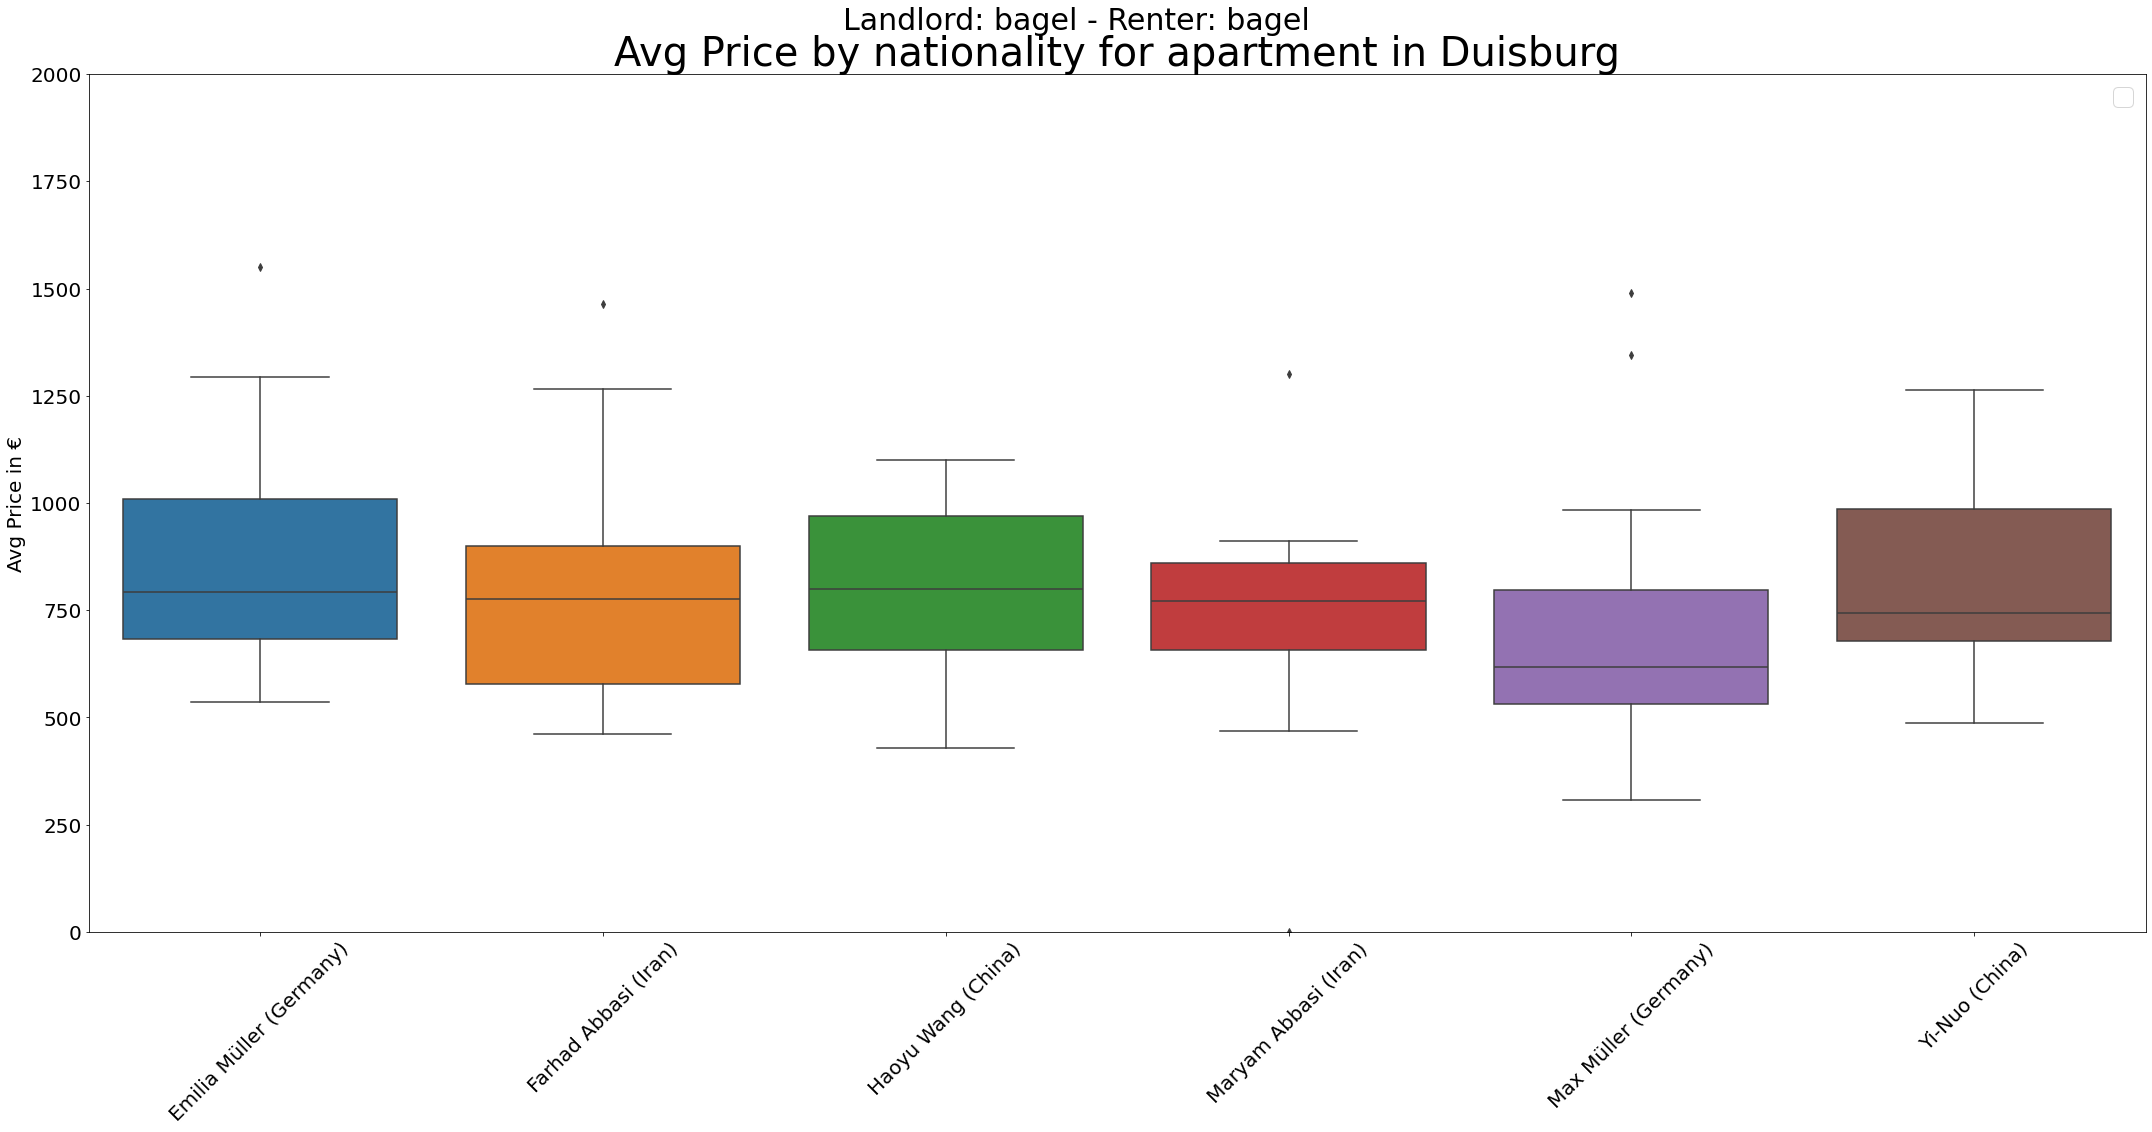

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


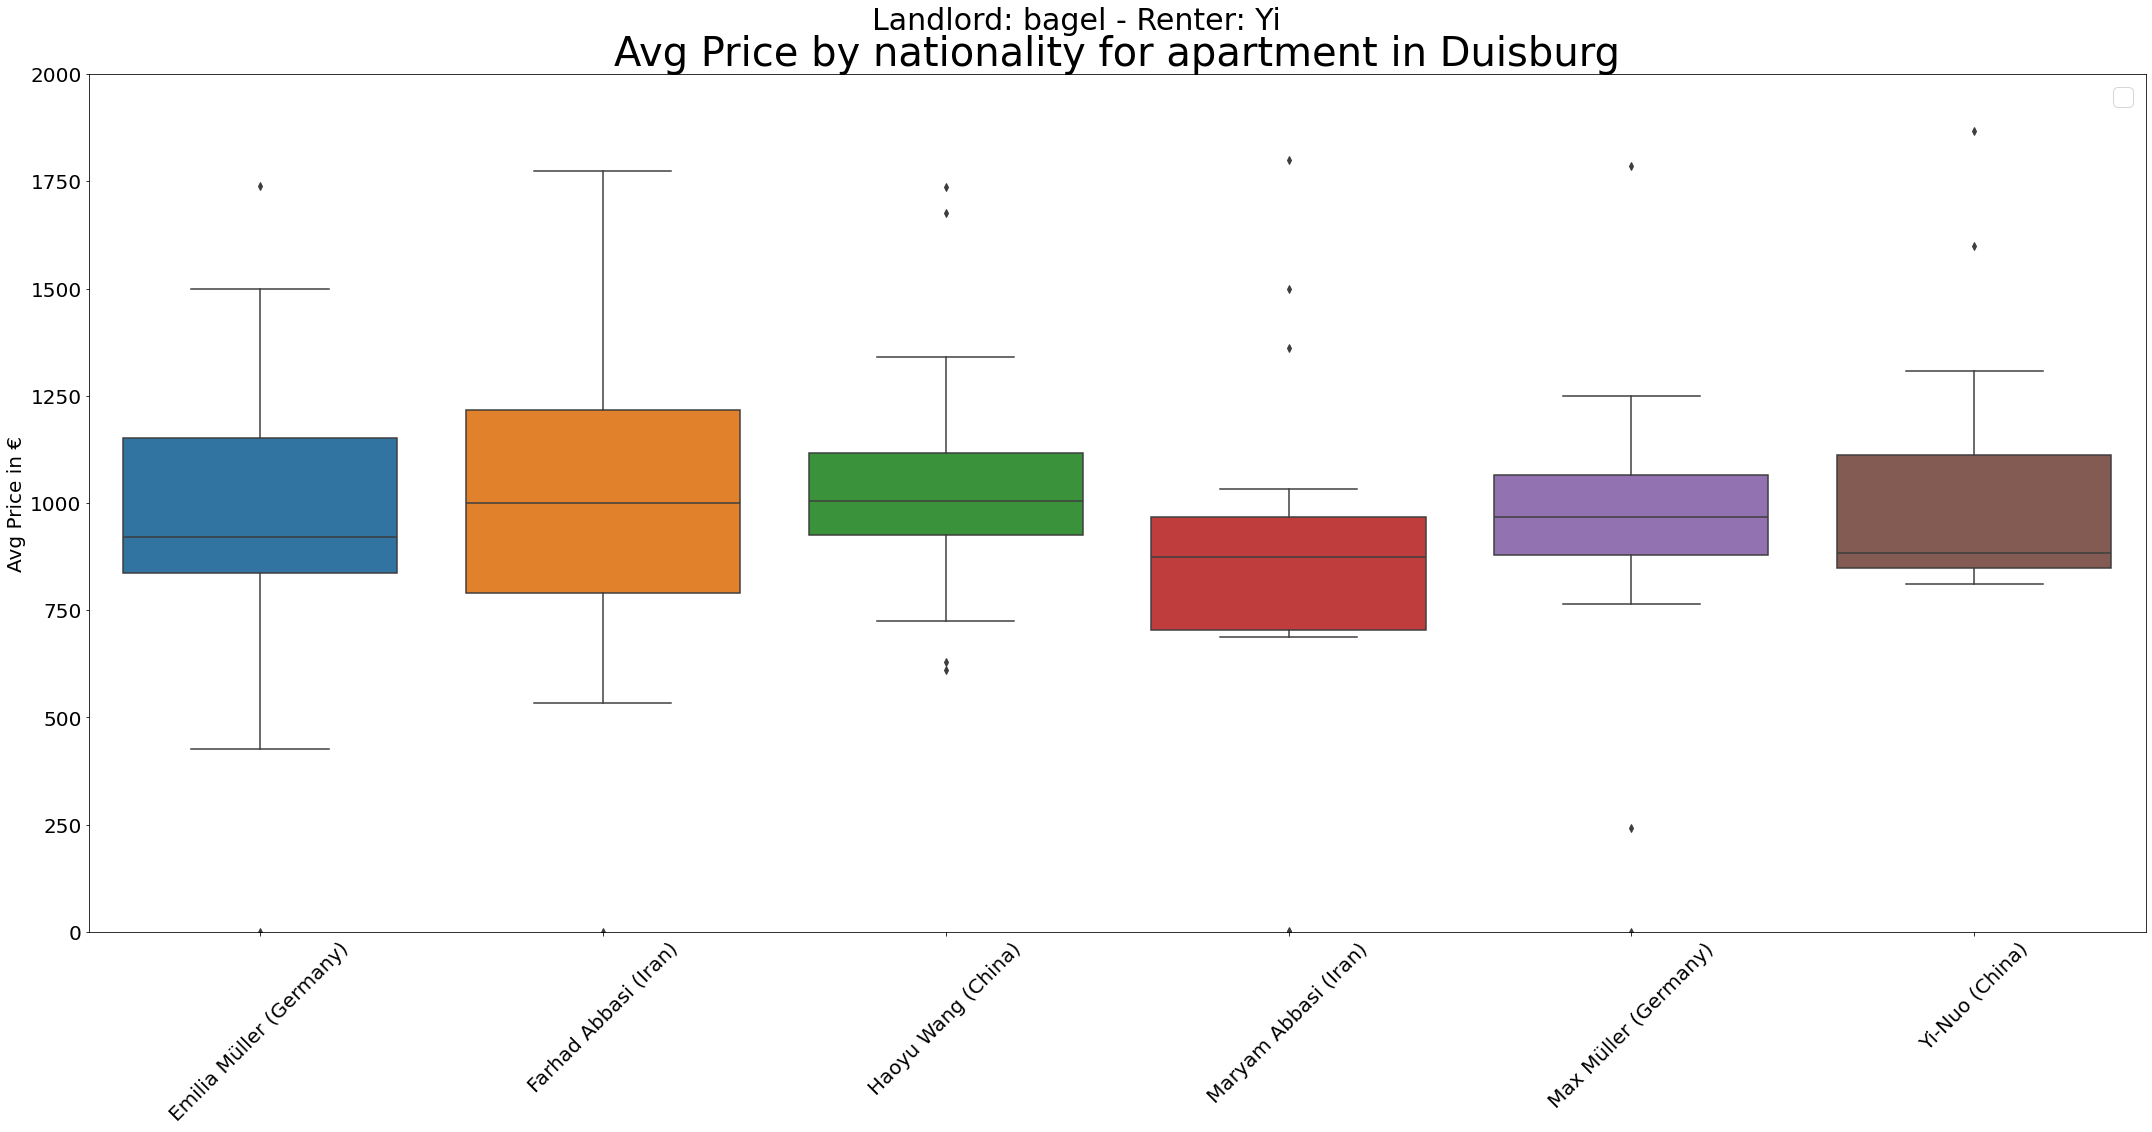

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


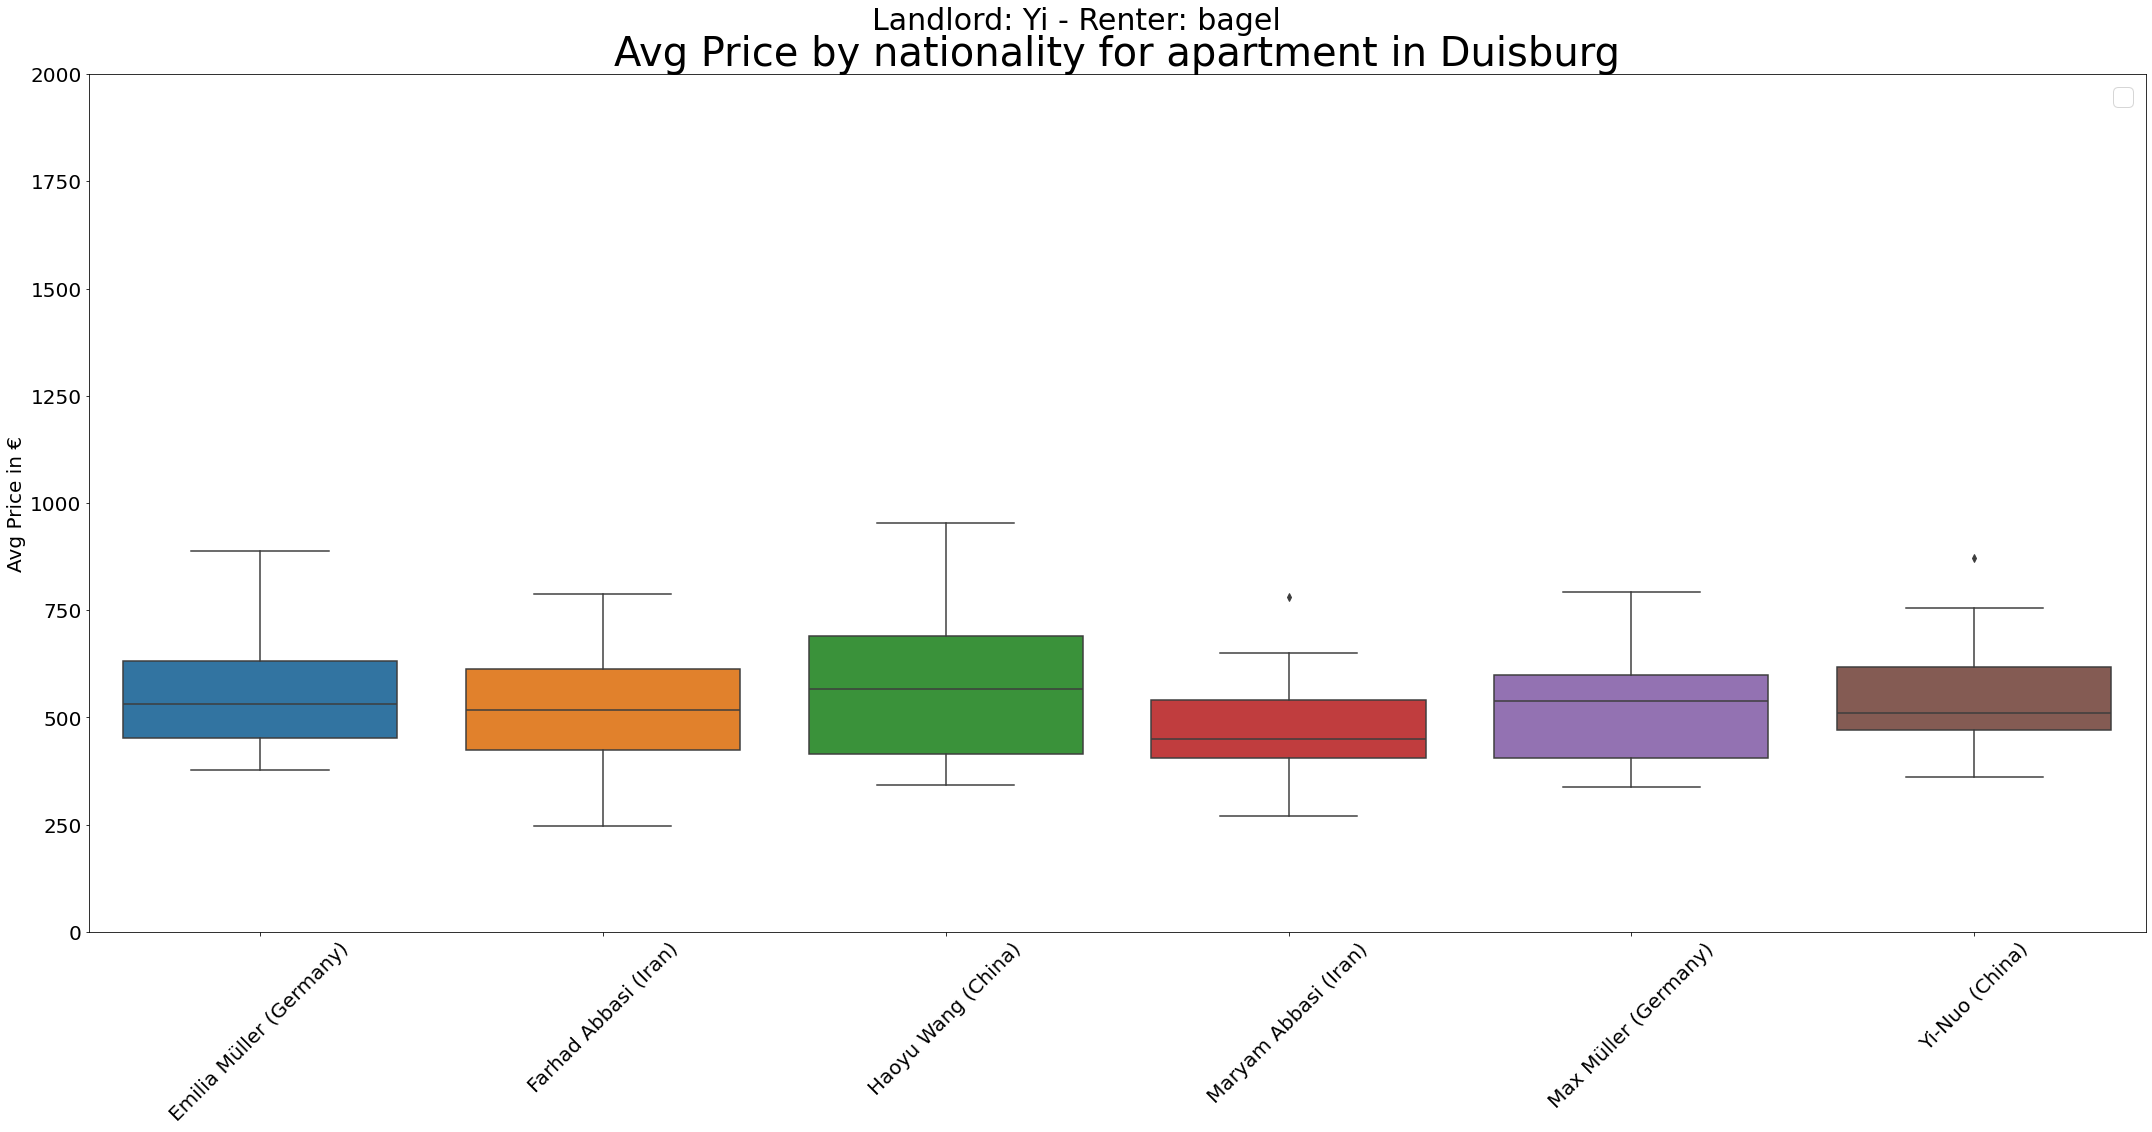

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


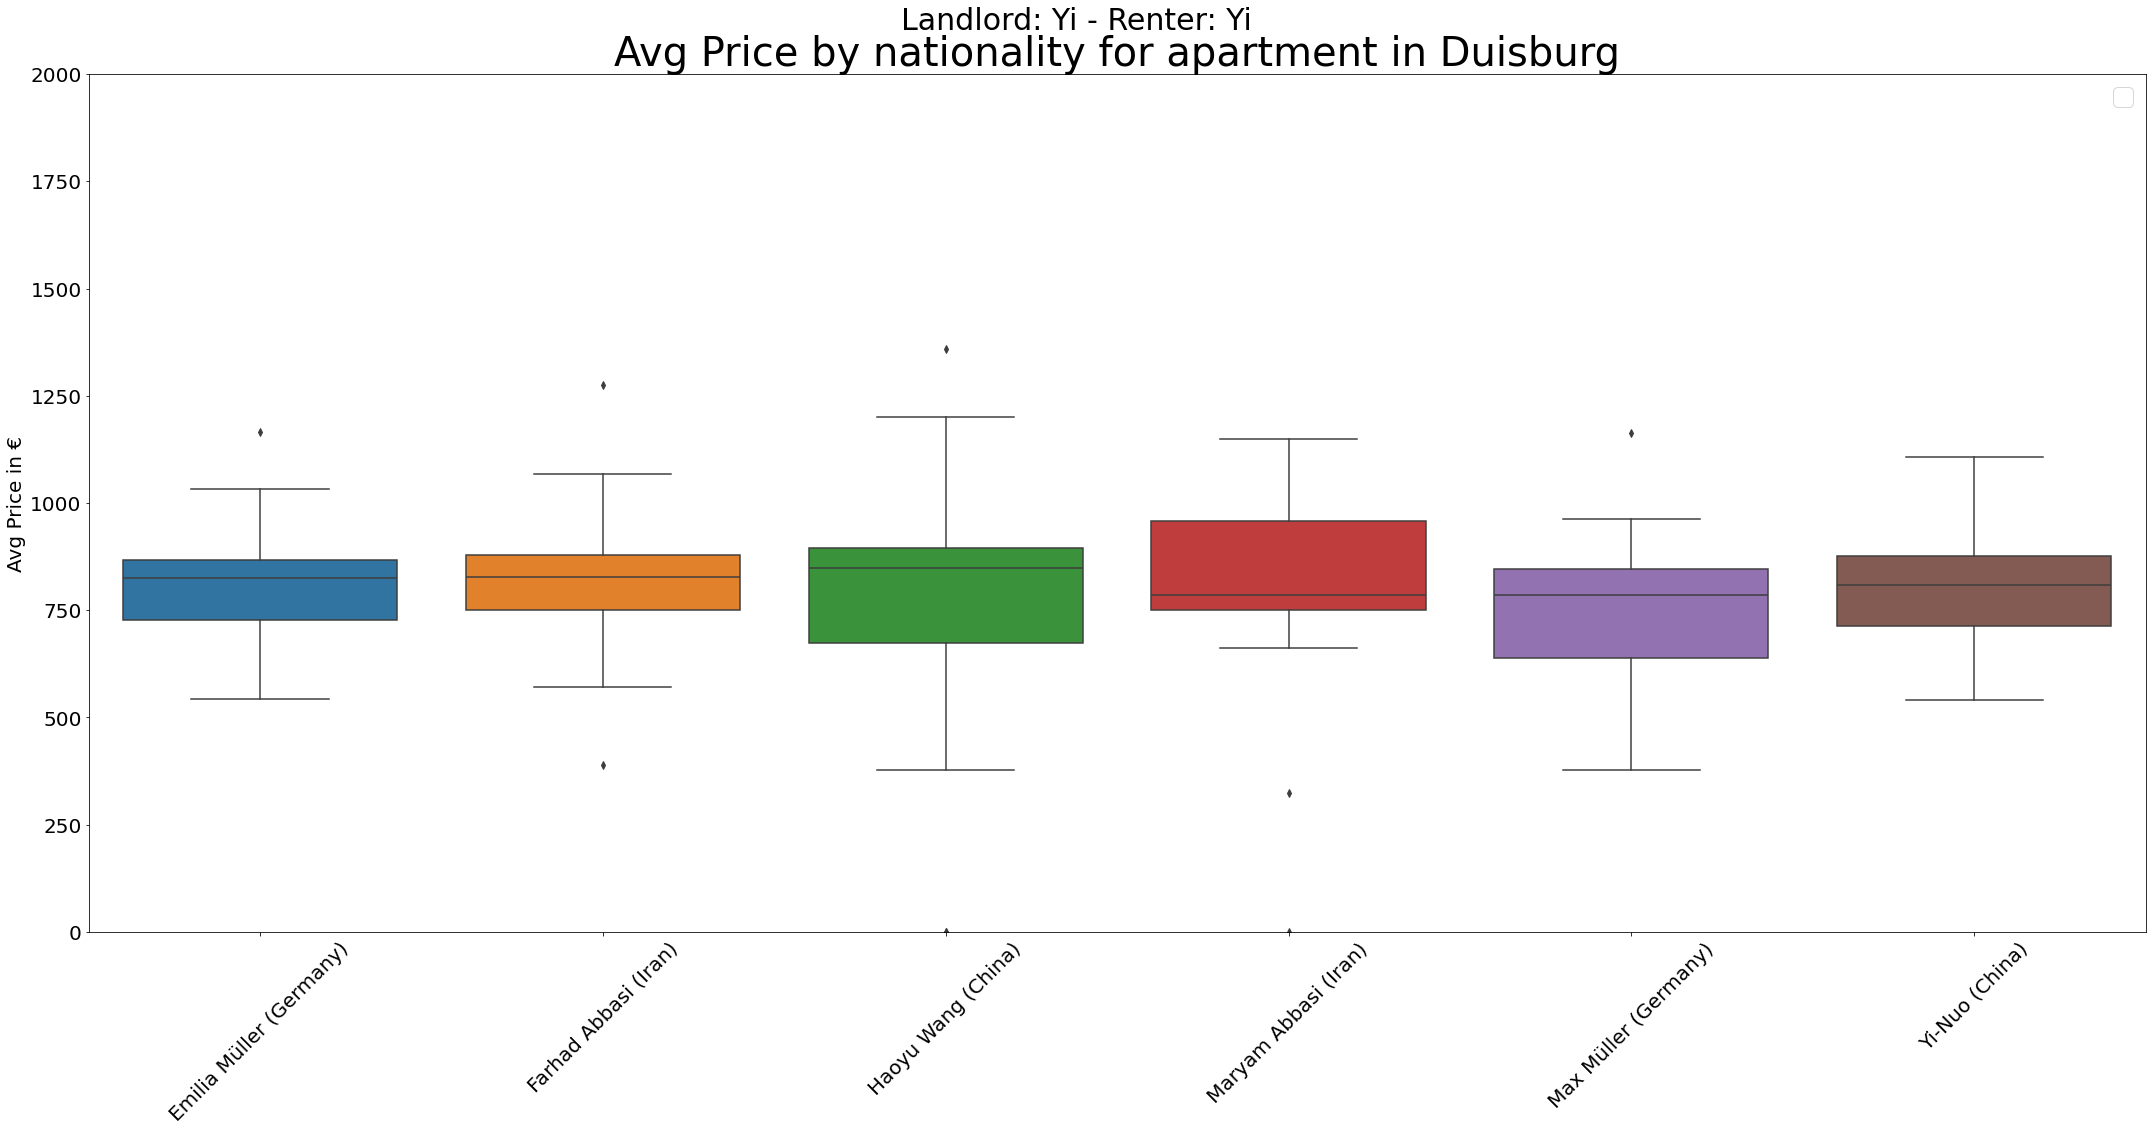

In [10]:
for df in folder_dfs.values():
    plot_country(df, column="Avg Price", city="Duisburg")

In [11]:
# create df without landlord Peter Schmidt
df_all_renter = df_all[df_all["name"] != "Peter Schmidt"] 
df_all_landlord = df_all[df_all["name"] == "Peter Schmidt"] 

In [12]:
df_all_renter.loc[df_all_renter["Avg Price"] <= 10, "Avg Price"] = np.nan

In [13]:
df_all_renter.groupby("city")["Avg Price"].mean()

city
Duisburg     788.242075
Magdeburg    696.033846
München      961.611771
Name: Avg Price, dtype: float64

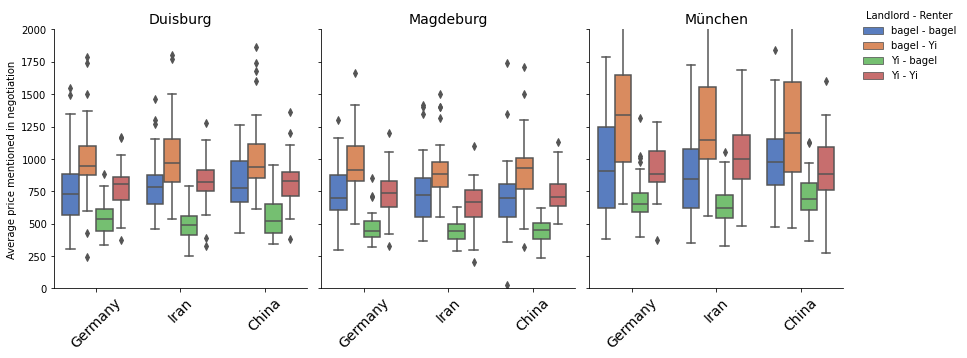

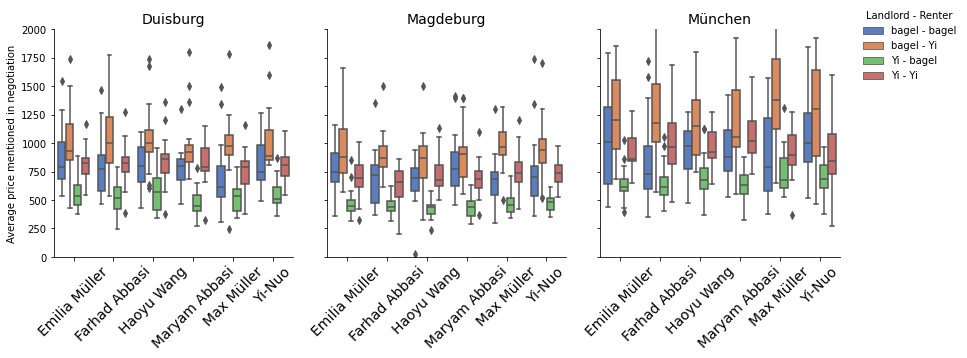

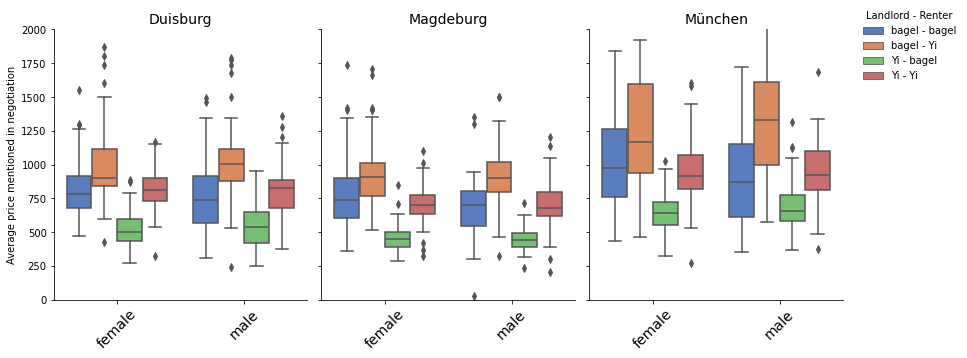

In [14]:
for var in ["country", "name", "gender"]:

    city_model_gender_box = sns.catplot(x=var, 
                                 y="Avg Price", 
                                 hue="cross_model", 
                                 col="city", 
                                 kind="box", 
                                 data=df_all_renter,
                                 col_wrap=3,
                                 palette="muted",
                                 height=5,
                                 aspect=0.7,
                                 legend_out=True)

    city_model_gender_box.set(ylim = (0,2000), ylabel="Average price mentioned in negotiation")

    sns.move_legend(city_model_gender_box, "upper left", bbox_to_anchor=(1, 1), title="Landlord - Renter")

#     plt.xlabel("")
#     for ax in city_model_gender_box.axes.flat:
#         ax.tick_params(axis='x', labelrotation=45, labelsize=14)
#         ax.set_xlabel("")
        
    for ax, title in zip(city_model_gender_box.axes.flat, ["Duisburg", "Magdeburg", "München"]):
        ax.tick_params(axis='x', labelrotation=45, labelsize=14)
        ax.set_xlabel("")
        ax.set_title(title, fontsize=14)

#     plt.suptitle("Average discussed prices by gender")
    plt.tight_layout()
    plt.savefig(f"{var}_box.png", bbox_inches='tight')


    plt.show()

In [15]:
split_values = df_all['Modified Price List'].str.split(', ', expand=True).iloc[:, :4].apply(lambda x: x.str.replace('[\[\]]', ''))
df_all[['Offer1', 'Offer2', 'Offer3', 'Offer4']] = split_values

In [16]:
df_all["Position"] = df_all["name"].apply(lambda x: "Renter" if x != "Peter Schmidt" else "Landlord")

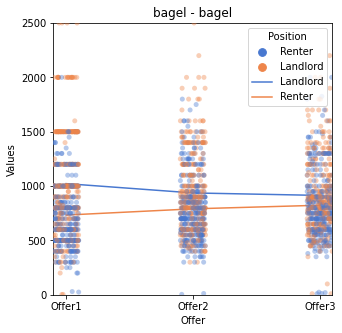

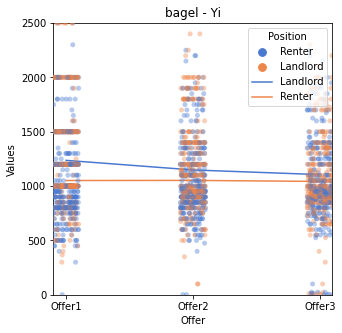

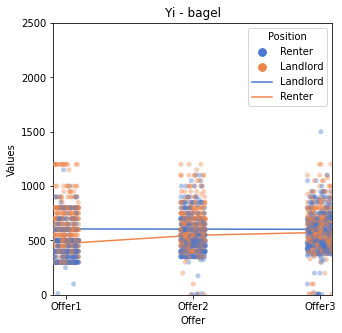

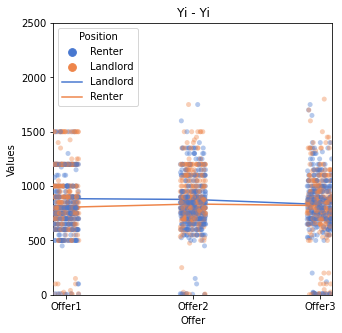

In [17]:
for cross_model in df_all["cross_model"].unique():
    df_melted = pd.melt(df_all[["name", "Position", "cross_model", "Offer1", "Offer2", "Offer3"]], id_vars=["Position", "name", "cross_model"], var_name='Offer', value_name='Values')
    df_melted.replace({None: np.nan}, inplace=True)
    df_melted['Values'] = pd.to_numeric(df_melted['Values'], errors='coerce')
    df_melted = df_melted[(df_melted["Values"] <= 4000) & (df_melted["cross_model"] == cross_model)]

    grouped = df_melted.groupby(["Position", "Offer"])["Values"].mean()

    fig = plt.figure(figsize=(5,5))
    sns.stripplot(x='Offer', y='Values', hue="Position", data=df_melted, palette="muted", alpha=0.4)
    sns.lineplot(x='Offer', y=grouped.values, hue="Position", data=grouped, palette="muted")
    plt.ylim(0,2500)
    plt.title(cross_model)

In [18]:
df_melted_diff = pd.melt(df_all[["name", "Position", "cross_model", "Offer1", "Offer2", "Offer3"]], id_vars=["name", "Position", "cross_model"], var_name='Offer', value_name='Values')
df_melted_diff.replace({None: np.nan}, inplace=True)
df_melted_diff['Values'] = pd.to_numeric(df_melted_diff['Values'], errors='coerce')
df_melted_diff = df_melted_diff[df_melted_diff["Values"] <= 4000]

grouped_diff = df_melted_diff.groupby(["Position", "cross_model", "Offer"])["Values"].mean()

In [19]:
differences = abs(grouped_diff.groupby(["cross_model", "Offer"]).diff())[12:]

In [20]:
differences

Position  cross_model    Offer 
Renter    Yi - Yi        Offer1     79.299480
                         Offer2     42.027908
                         Offer3     10.347769
          Yi - bagel     Offer1    133.257683
                         Offer2     57.065463
                         Offer3     29.068888
          bagel - Yi     Offer1    185.426422
                         Offer2     96.042326
                         Offer3     62.854967
          bagel - bagel  Offer1    289.229990
                         Offer2    146.281701
                         Offer3     90.386078
Name: Values, dtype: float64

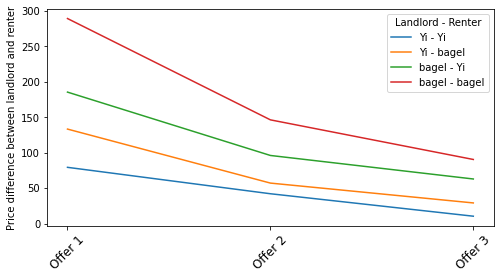

In [21]:
fig, ax = plt.subplots(figsize=(8,4))

differences.unstack("cross_model").plot(kind="line", ax=ax)
ax.set_xticks(range(3))
ax.set_xticklabels(["Offer 1", "Offer 2", "Offer 3"], fontsize=12, rotation=45)
ax.set_xlabel("")
ax.set_ylabel("Price difference between landlord and renter")
plt.legend(title="Landlord - Renter", fontsize=10)

plt.savefig("price_differences.png", bbox_inches='tight')
plt.show()

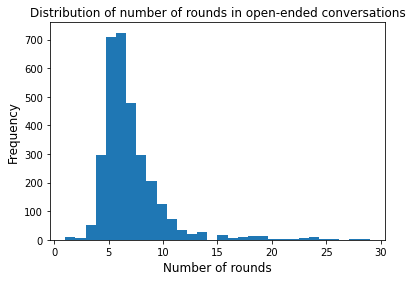

In [22]:
fig, ax = plt.subplots(figsize=(6,4))

df_all[df_all["Rounds"] < 30]["Rounds"].hist(bins=30)
plt.xlabel("Number of rounds", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of number of rounds in open-ended conversations")
ax.grid(False)
plt.savefig("histogram_open-ended")
plt.show()

In [23]:
df_all["Rounds"].describe()

count    3172.000000
mean        7.105296
std         4.361497
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max       101.000000
Name: Rounds, dtype: float64